In [4]:
import sys
sys.path.append('..')
import ugent
import numpy as np
import matplotlib.pyplot as plt
from pyslise import PyslisePeriodic

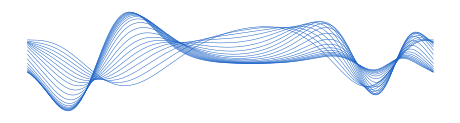

In [18]:
x = np.linspace(0, 1, 1000)

ref = -x

def curve(s):
    global ref
    def V1(x):
        return -x*x*(1-x)

    def V(x):
        return s*(2*V1(x**4) + V1((1-x)**2.5))
    
    
    p = PyslisePeriodic(V, 0, 1, K=[[1,0],[0,1]], tolerance=1e-12)
    i, E, fs = p.eigenpairsByIndex(4, 5)[0]
    assert len(fs) == 1, s
    y = fs[0](x)[0, :]
    if np.count_nonzero(y * ref > 0) > np.count_nonzero(y * ref < 0):
        return -y
    return y

ref = curve(5000)

fig, ax = plt.subplots(1, 1, figsize=(8,2))
for s in np.linspace(1950, 10000, 20):
    ax.plot(x, -curve(s), c=ugent.blauw, lw=0.5)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig(f"background.pdf", bbox_inches="tight")
plt.show()

bash: line 1: pdf-crop-margins: command not found


CalledProcessError: Command 'b'pdf-crop-margins background.pdf -o background.pdf\n'' returned non-zero exit status 127.